Создание графиков в стиле книжного рисунка...


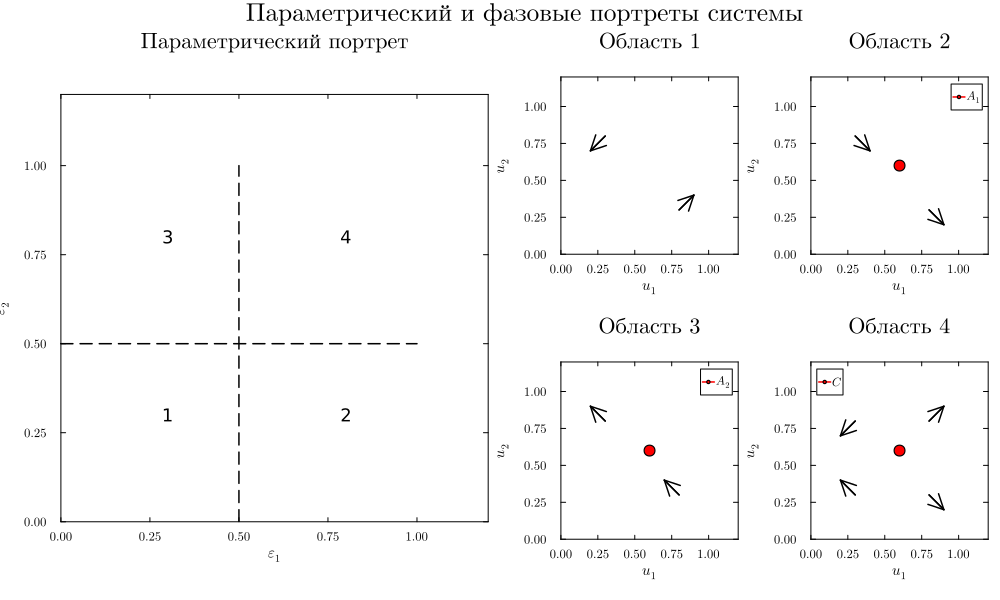

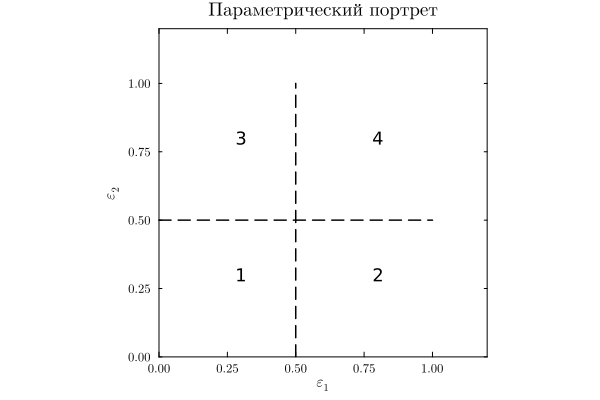

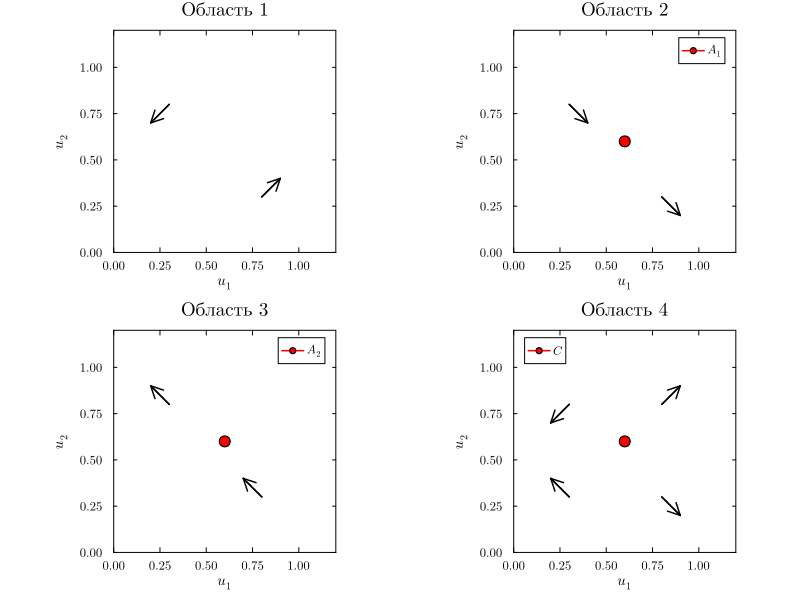

Графики сохранены в файлы:
- parametric_phase_portraits_combined.png
- parametric_portrait.png
- phase_portraits.png


In [1]:
using Plots
using LaTeXStrings

# Настройки для стиля, похожего на книжный
default(fontfamily="Computer Modern",
        titlefontsize=12,
        guidefontsize=10,
        tickfontsize=8,
        legendfontsize=8,
        linewidth=1.5,
        grid=false,
        framestyle=:box)

# Параметрический портрет (левый график)
function parametric_portrait()
    p1 = plot(xlims=(0,1.2), ylims=(0,1.2), aspect_ratio=:equal,
             xlabel=L"\varepsilon_1", ylabel=L"\varepsilon_2",
             title="Параметрический портрет")

    # Области с номерами как на рисунке
    annotate!(p1, 0.3, 0.3, text("1", 12, :black))
    annotate!(p1, 0.8, 0.3, text("2", 12, :black))
    annotate!(p1, 0.3, 0.8, text("3", 12, :black))
    annotate!(p1, 0.8, 0.8, text("4", 12, :black))

    # Разделительные линии
    plot!(p1, [0.5, 0.5], [0, 1], linestyle=:dash, color=:black, label="")
    plot!(p1, [0, 1], [0.5, 0.5], linestyle=:dash, color=:black, label="")

    return p1
end

# Фазовые портреты (правые графики)
function phase_portraits()
    # Создаем 4 подграфика для фазовых портретов
    plots_list = []

    # Фазовый портрет 1 (область 1)
    p1 = plot(xlims=(0,1.2), ylims=(0,1.2), aspect_ratio=:equal,
             xlabel=L"u_1", ylabel=L"u_2", title="Область 1")
    # Добавляем стрелки направления
    quiver!(p1, [0.3, 0.8], [0.8, 0.3], quiver=([-0.1, 0.1], [-0.1, 0.1]), color=:black)

    # Фазовый портрет 2 (область 2)
    p2 = plot(xlims=(0,1.2), ylims=(0,1.2), aspect_ratio=:equal,
             xlabel=L"u_1", ylabel=L"u_2", title="Область 2")
    quiver!(p2, [0.3, 0.8], [0.8, 0.3], quiver=([0.1, 0.1], [-0.1, -0.1]), color=:black)
    plot!(p2, [0.6], [0.6], marker=:circle, color=:red, markersize=6, label=L"A_1")

    # Фазовый портрет 3 (область 3)
    p3 = plot(xlims=(0,1.2), ylims=(0,1.2), aspect_ratio=:equal,
             xlabel=L"u_1", ylabel=L"u_2", title="Область 3")
    quiver!(p3, [0.3, 0.8], [0.8, 0.3], quiver=([-0.1, -0.1], [0.1, 0.1]), color=:black)
    plot!(p3, [0.6], [0.6], marker=:circle, color=:red, markersize=6, label=L"A_2")

    # Фазовый портрет 4 (область 4)
    p4 = plot(xlims=(0,1.2), ylims=(0,1.2), aspect_ratio=:equal,
             xlabel=L"u_1", ylabel=L"u_2", title="Область 4")
    quiver!(p4, [0.3, 0.8, 0.3, 0.8], [0.8, 0.3, 0.3, 0.8],
            quiver=([-0.1, 0.1, -0.1, 0.1], [-0.1, -0.1, 0.1, 0.1]), color=:black)
    plot!(p4, [0.6], [0.6], marker=:circle, color=:red, markersize=6, label=L"C")

    return [p1, p2, p3, p4]
end

# Создаем полный рисунок аналогичный книжному
function create_complete_figure()
    # Левый график - параметрический портрет
    left_plot = parametric_portrait()

    # Правые графики - фазовые портреты
    right_plots = phase_portraits()

    # Комбинируем все графики
    layout = @layout [a [b c; d e]]  # левый большой, правые 2x2

    combined_plot = plot(left_plot, right_plots...,
                        layout=layout,
                        size=(1000, 600),
                        plot_title="Параметрический и фазовые портреты системы",
                        titlefontsize=14)

    return combined_plot
end

# Альтернативный вариант: два отдельных рисунка как в книге
function create_separate_figures()
    # Рисунок а: параметрический портрет
    fig_a = parametric_portrait()

    # Рисунок б: фазовые портреты
    fig_b = plot(phase_portraits()..., layout=(2,2), size=(800, 600))

    return fig_a, fig_b
end

# Создаем и отображаем графики
println("Создание графиков в стиле книжного рисунка...")

# Вариант 1: объединенный рисунок
complete_fig = create_complete_figure()
display(complete_fig)
savefig(complete_fig, "parametric_phase_portraits_combined.png")

# Вариант 2: отдельные рисунки
fig_a, fig_b = create_separate_figures()
display(fig_a)
savefig(fig_a, "parametric_portrait.png")
display(fig_b)
savefig(fig_b, "phase_portraits.png")

println("Графики сохранены в файлы:")
println("- parametric_phase_portraits_combined.png")
println("- parametric_portrait.png")
println("- phase_portraits.png")